In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akram24/position-salaries")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'position-salaries' dataset.
Path to dataset files: /kaggle/input/position-salaries


In [33]:
dataset = pd.read_csv('/kaggle/input/position-salaries/Position_Salaries.csv')
print(dataset.head())
X = dataset[['Level']].values
y = dataset['Salary'].values

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [34]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [40]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
print(X_poly)


[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


In [42]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

/tmp/ipython-input-3578457253.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)


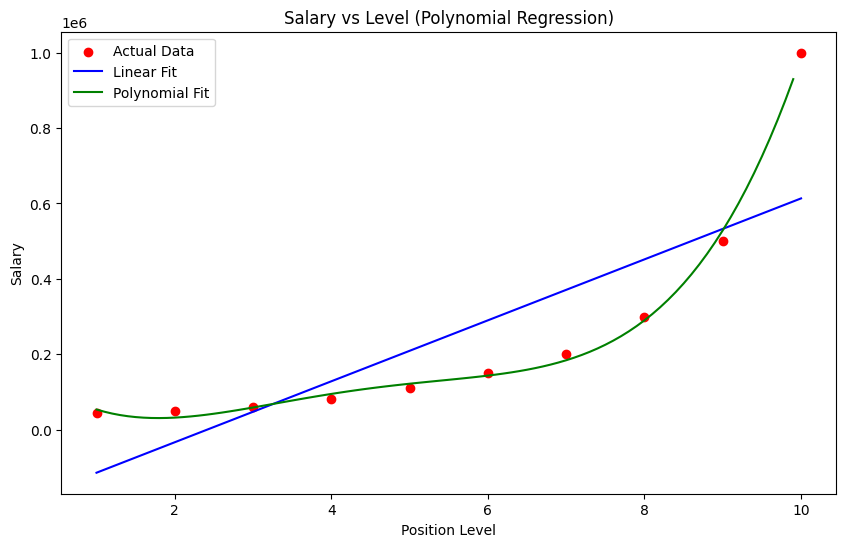

In [46]:
plt.figure(figsize=(10, 6))

# Plotting the real data points (Red dots)
plt.scatter(X, y, color='red', label='Actual Data')

# Plotting the Linear Regression (Blue straight line)
plt.plot(X, lr.predict(X), color='blue', label='Linear Fit')

# Plotting the Polynomial Regression (Green curve)
# We use a smoother line for the curve
X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)
plt.plot(X_grid, lin_reg_2.predict(poly.fit_transform(X_grid)), color='green', label='Polynomial Fit')

plt.title('Salary vs Level (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [48]:
val = [[6.5]]
lin_pred = lin_reg.predict(val)
poly_pred = lin_reg_2.predict(poly.fit_transform(val))

print(f"Linear Prediction for level 6.5: ${lin_pred[0]:,.2f}")
print(f"Polynomial Prediction for level 6.5: ${poly_pred[0]:,.2f}")

Linear Prediction for level 6.5: $330,378.79
Polynomial Prediction for level 6.5: $158,862.45


In [51]:
import pickle
with open('poly_reg.pkl', 'wb') as f:
    pickle.dump(lin_reg_2, f)

with open('poly_transformer.pkl', 'wb') as f:
    pickle.dump(poly, f)

print("Files saved: poly_model.pkl and poly_transformer.pkl")

Files saved: poly_model.pkl and poly_transformer.pkl


In [53]:
from google.colab import files
files.download('poly_reg.pkl')
files.download('poly_transformer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>